## Python for REU 2021

__Burt Rosenberg, University of Miami__

_Second version, 18 May 2021_

_First version, 21 May 2019_



### Concepts:

1. __Programming Techniques__
   1. Subclasses
   1. Inheritance
   1. Calling init
   1. Abstract Classes
   1. Exceptions (raise)
   1. Class Diagrams
1. __Inference Principles__
   1. Baysian Statistics
   1. Bayes Law
   1. Likelihoods
   1. Maximum Likelihood Estimation


### Bayesian Statistics

This draws heavily from [Think Bayes](https://www.amazon.com/Think-Bayes-Bayesian-Statistics-Python) by Allen Downey. The code is from that book. A selection of similar problems are found on Prof. Downey's [All your Bayes are belong to us!](https://allendowney.blogspot.com/2011/10/all-your-bayes-are-belong-to-us.html) post and his [Blinky Monty Problem](https://allendowney.blogspot.com/2011/10/blinky-monty-problem.html) post.

The idea of Bayesian Statistics is probability understod as an expression of belief,

> In Baysian statistics, probably is analogous to belief. The higher the probablity the more one believes that the event is the case. It is the probability of the Weather Channel. Tomorrow will occur and it will occur only once &mdash; to say _"50 out of 100 times it was March 22nd, 2019,  it rained"_ makes no sense.

The mantra of Bayesnian statistics is that the subjectivity is captured in the _prior_. But once that subjectivity is accounted for, the rest is objective. Data will update that prior by providing supporting or refuting evidence, and the posterior probability reflects the rational person's belief, given the prior and the evidence.

Bayes Law calculates the new belief that <code>H<sub>i</sub></code> is the case given the prior of the probability of <code>H<sub>i</sub></code> and the occurence of event <code>D</code>,

> <code>P(H<sub>i</sub>|D) P(D) = P(D|H<sub>i</sub>) P(H<sub>i</sub>)</code>

the symbol <code>P(D|H<sub>i</sub>)</code> is called the _likelihood_. The value P(H<sub>i</sub>) is given, and typically the likelihood P(D|H<sub>i</sub>)  is easy to calculate. Of the hypothesis are constructed a certain way,  the probability <code>P(D)</code> can be easily calculated as well. 

If the <code>H<sub>i</sub></code> are mutually exclusive and collectively exhaustive, then <code>P(H<sub>i</sub>|D)</code> will sum to 1, hence

> <code>1 = Sum<sub>i</sub> P(D|H<sub>i</sub>) P(H<sub>i</sub>)/ P(D),</code> 

so

> <code>P(D) = Sum<sub>i</sub> P(D|H<sub>i</sub>) P(H<sub>i</sub>)</code>.

This is also known as the [Law of Total Probability](https://en.wikipedia.org/wiki/Law_of_total_probability).

So here is the method,

1. Starting with the probability vector <code>P(H<sub>i</sub>)</code>, either totall a priori or for the last update iteration,
1. Given observation <code>D</code> update each element of the vector by the likelihood of event `D` under hypothesis <code>H<sub>i</sub></code>.
1. Normalize the vector (this implicitly calculates `P(D)`).
1. After all observations (or at any point in the observation suite) make a decision based on the current values of the probability vector <code>P(H<sub>i</sub>)</code>.

__The Train Problem__

We want to estimate the number of trains owned by a certain railroad company, given the observation of trains, and the train number. We know that the company numbers its trains consecutively starting with one. If we observe train 60, for instance, then we know that company owns at least 60 trains. We make several measurements and then provide a guess as to how many trains we haven't seen.

In this problem we assume that any possible train is just as likely to pass by. Hence if the hypothesis is that the company runs `h` trains, the likelihood to see train `m` is `1/h`, independent of `m`.

We keep a probability distribution over all hypothesis, and with each observation we update this distribution, by applying the likelihood that that train would be observed under that hypothesis.

This problem considers two priors. One prior is a _uniform distribution_ over a range from 1 to n. That is, we assume there are some number of trains, but never more than n, and we have no preference for one number of trains compared to another.  This results in some answer. However, things being what they are, it seems silly to think that there is a magic n, and all train companies choose a number uniformly between 1 and n, and that's the number of trains they run. 

We can take as our prior distribution that the number of trains a company owns follows a _power law_, C k<sup>&alpha;</sup>, C chosen so the sum over k is 1.. The parameter &alpha; is usually close to one, and we take it to be 1. That is, our distribution is 1/k. (Note this does not have an indefinited integral, but we also assume a maximum x.) Using a power law distribution we find that our estimations are less sensitive to the arbitrary parameter choices we make when choosing a prior.

__Update__


If the hypothesis says there are n trains, and the train number observed is m, then if m is greater than n, the hypothesis is discarded. It cannot be true. Its probability is set to zero. Otherwise, we give a likelihood of 1/n to the occurence, blindly assuming that of the n trains that we could have been sent our way, any of the n are equally likely to have been sent our way.


__Coding Techniques__

The code demonstrates some features of classes. There is a _base class_ for a Probability Mass Function, and particular PMF's inherit from it. They enhance the class by initilizing a discretized PMF according to either the Uniform or the Power Law distribution.

The `Bayes class` contains the basic framework for estimation. On creation it is provided a prior, in the form of an initialized object of `class Pmf`. The exact type of the Pmf object will be a _subclass_, depending on distribution, but all share the class Pmf which ensures that the object has the functionality needed for the Bayes class. 

The Bayes class is _abstract_, that is, while it provides a blueprint for methods, the likelihood method is unspecified. That method encodes the particular likelihood function for, say, the Train problem, and therefore the Train class subclasses it and provides the working body of the likelihood method correct for the Train problem.


<pre>
       +--------+        references       +----------+
       |  PMF   |---------------------+   |   Bayes  |
       +--------+                     |   +----------+
         |    | is-a +-------------+  |        | is-a
         |    +------| Uniform PMF |  |   +-----------+
         | is-a      +-------------+  +---|   Train   |
         |      +---------------+         +-----------+
         +------| Power Law PMF |
                +---------------+
</pre>


The Pmf has two instance variables: and ndarray of hypothesis (the number of trains that the company owns) and an ndarray of probabilities (the probability that the company owns that number of trains). It has some basic methods that are inherited by any Pmf, including the two we implement: the Uniform PMF and the Power Law PMF.

The Bayes class has all the machinery for the method, but lacks an implementation of the Likelihood method. It has a method but will throw an NotImplementedError exception. When subclassed by the Train class this method is implemented.

__Deciding to decide__

Given the distribution of probabilities for each hypothesis, we next consider what our answer will be. 

One approach is to choose the Maximum Likelihood Estimation. Look for the maximum of the probability distribution. However, that will always give the maximum label of any train observed. Why is this so? Suppose this maximum was H, then the value assigned to any train is 1/H. The larger H, the smaller 1/H, so the maximum likelihood would maximum 1/H hence minimized H. It cannot be less than H, however. We cannot claim there are only J trains when we know by observation there are H > J.

While it seems reasonable, on closer inspection, the Maximum Likelihood Estimation would make the very unlikely  conclusion that you are always lucky enough to see train of largest label.

So we give two alternatives &mdash; the mean of the distribution and a credible interval, outside of which there is limited probability weight. The credible interval is calculated by a cumulative sum of probabilities until we reach the desired probability weight. Here we use 5% and 95% for the interval. That is, we assume unlikely anything in the two tails which each weigh 1/20 of the total probability.



num= 1000 obs= [60]
uniform prior 333.4198932637079
credible interval (69, 869)
power law prior 178.5473531797161
credible interval (62, 559)


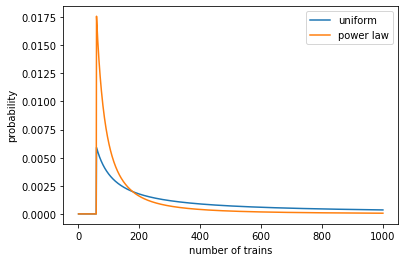

num= 1000 obs= [30, 60, 90]
uniform prior 164.30558642273346
credible interval (92, 373)
power law prior 133.27523137503107
credible interval (91, 242)


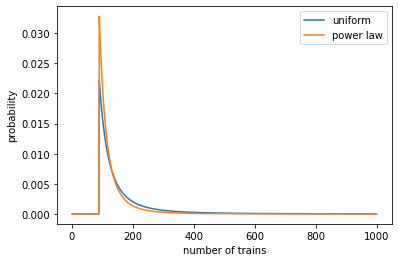

num= 500 obs= [30, 60, 90]
uniform prior 151.84958795903836
credible interval (92, 316)
power law prior 133.27523137503107
credible interval (91, 242)


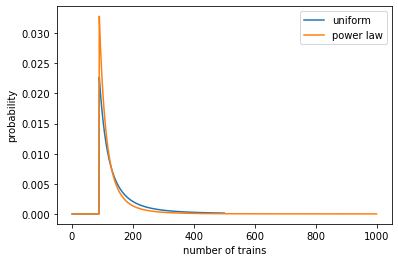

num= 2000 obs= [30, 60, 90]
uniform prior 171.3381810915096
credible interval (92, 393)
power law prior 133.27523137503107
credible interval (91, 242)


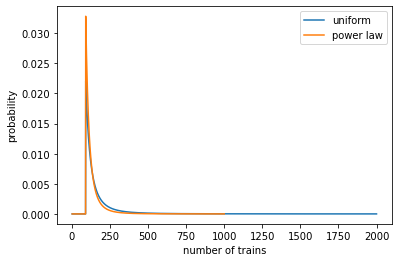

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np


class Pmf:
    
    def __init__(self,hypoth,prob):
        assert len(hypoth)==len(prob)
        self.n = len(prob)
        self.hypoth = np.array(hypoth)
        self.prob = np.array(prob)
        self.normalize()
        
    def normalize(self):
        t = self.prob.sum()
        assert t>0
        self.prob = self.prob/t
    
    def tell_distribution(self):
        return (self.hypoth,self.prob)
    
    def mean(self):
        return (self.hypoth*self.prob).sum()
    
    def percentile(self,percent):
        p = percent/100.0
        t = 0.0
        for i in range(self.n):
            t += self.prob[i]
            if t>=p:
                return self.hypoth[i]
        return None
    
    def credible_interval(self):
        return (self.percentile(5),self.percentile(95))
        
        
class UniformDist(Pmf):
    def __init__(self,n):
        Pmf.__init__(self,range(1,n+1),[1.0]*n)
        
class PowerLawDist(Pmf):
    def __init__(self,n,alpha=1.0):
        self.alpha = alpha
        h = range(1,n+1)
        p = [x**(-alpha) for x in h]
        Pmf.__init__(self,h,p)

class Bayes:
    
    def __init__(self,pmf):
        assert isinstance(pmf,Pmf)
        self.pmf = pmf
    
    def update(self,data):
        for i in range(self.pmf.n):
            like = self.likelihood(data,self.pmf.hypoth[i])
            self.pmf.prob[i] *= like
        return self.pmf.normalize()

    def likelihood(self,data,hypo):
        raise NotImplementedError()
        
class Train(Bayes):
    
    # inherit __init__
    
    def likelihood(self,data,hypo):
        if hypo<data:
            return 0.0
        else:
            return 1.0/hypo

def run_bayes(num,obs):
    
    print("num=",num,"obs=",obs)
    suite = Train(UniformDist(num))
    for o in obs:
        suite.update(o)
    print("uniform prior",suite.pmf.mean())
    print("credible interval",suite.pmf.credible_interval())
    (h,p)= suite.pmf.tell_distribution()
    plt.plot(h,p)

    suite = Train(PowerLawDist(1000))
    for o in obs:
        suite.update(o)
    print("power law prior", suite.pmf.mean())
    print("credible interval",suite.pmf.credible_interval())
    (h,p)= suite.pmf.tell_distribution()

    plt.plot(h,p)
    plt.xlabel("number of trains")
    plt.ylabel("probability")
    plt.legend(["uniform","power law"])

    plt.show()

run_bayes(1000,[60])
run_bayes(1000,[30,60,90])
run_bayes(500,[30,60,90])
run_bayes(2000,[30,60,90])
